In [1]:
# Import modules
import sys
import os
import pandas as pd

In [2]:
# Append the project root path to sys.path
sys.path.append(os.path.abspath("../scripts"))

In [3]:
#  Import Custom Module
import comodity_analysis as ca


In [4]:
#  Load and Preprocess Data

# Load Brent oil price (Daily)
oil_df = ca.load_data("../data/BrentOilPrices.csv")

# Load GDP data (Annual) and align it with daily oil prices
gdp_df = ca.load_gdp_data("../data/USA_GDP_Growth.csv") 

C:\Users\HP\OneDrive\Desktop\ai2\kaim-week-10\scripts\comodity_analysis.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(file_path, parse_dates=["Date"], dayfirst=True)


Data Loaded Successfully from ../data/BrentOilPrices.csv!

GDP Data Expanded to Daily Frequency:
              GDP  GDP per Capita  Growth
Year                                     
1961-01-01  563.3          3067.0     2.3
1961-01-02  563.3          3067.0     2.3
1961-01-03  563.3          3067.0     2.3
1961-01-04  563.3          3067.0     2.3
1961-01-05  563.3          3067.0     2.3


In [5]:
#print oil df
oil_df.head(10)

,Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63
1987-05-27,18.60
1987-05-28,18.60
1987-05-29,18.58
1987-06-01,18.65


In [6]:
# print gdp df
gdp_df.head(10)

,GDP,GDP per Capita,Growth
Year,,,
1961-01-01,563.3,3067.0,2.3
1961-01-02,563.3,3067.0,2.3
1961-01-03,563.3,3067.0,2.3
1961-01-04,563.3,3067.0,2.3
1961-01-05,563.3,3067.0,2.3
1961-01-06,563.3,3067.0,2.3
1961-01-07,563.3,3067.0,2.3
1961-01-08,563.3,3067.0,2.3
1961-01-09,563.3,3067.0,2.3


In [7]:
# merge the two datasets
merged_df = ca.merge_oil_gdp(oil_df, gdp_df)


Merged dataset preview:
            Price      GDP  GDP per Capita  Growth
Date                                              
1987-05-20  18.63  4855.22         20039.0    3.46
1987-05-21  18.45  4855.22         20039.0    3.46
1987-05-22  18.55  4855.22         20039.0    3.46
1987-05-25  18.60  4855.22         20039.0    3.46
1987-05-26  18.63  4855.22         20039.0    3.46


In [8]:
merged_df.head(15)

,Price,GDP,GDP per Capita,Growth
Date,,,,
1987-05-20,18.63,4855.22,20039.0,3.46
1987-05-21,18.45,4855.22,20039.0,3.46
1987-05-22,18.55,4855.22,20039.0,3.46
1987-05-25,18.60,4855.22,20039.0,3.46
1987-05-26,18.63,4855.22,20039.0,3.46
1987-05-27,18.60,4855.22,20039.0,3.46
1987-05-28,18.60,4855.22,20039.0,3.46
1987-05-29,18.58,4855.22,20039.0,3.46
1987-06-01,18.65,4855.22,20039.0,3.46


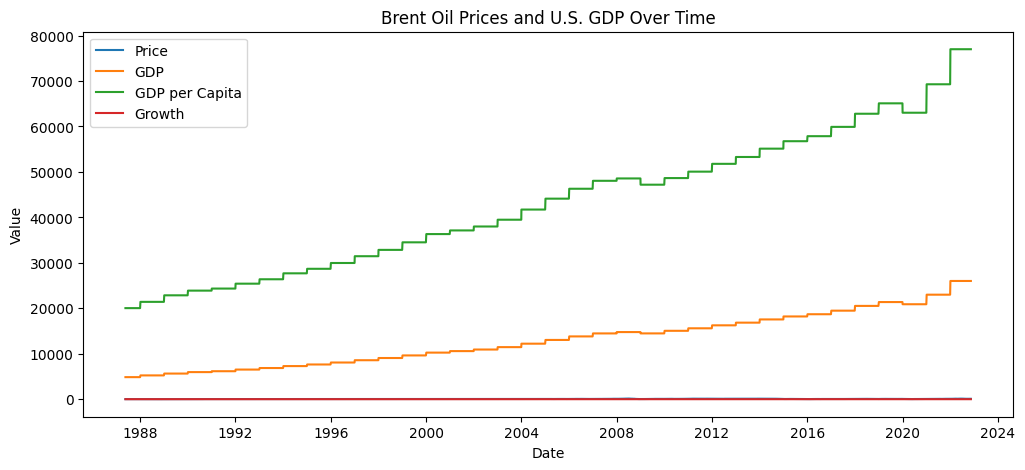

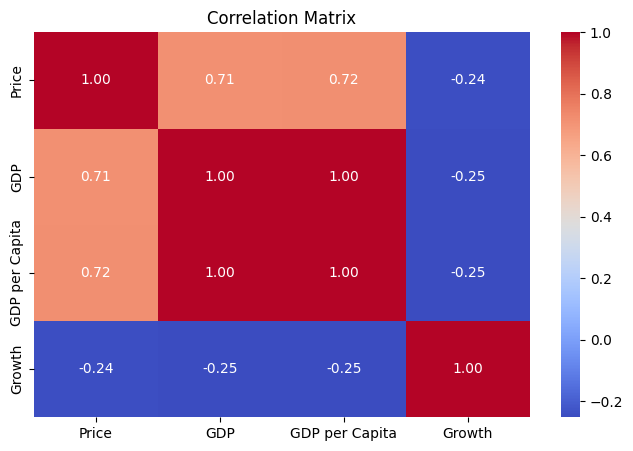

In [9]:
#  Exploratory Data Analysis (EDA)

# visualization of the merged dataset and corelation of different attributes 
ca.visualize_data(merged_df, "Brent Oil Prices and U.S. GDP Over Time")
ca.correlation_analysis(merged_df)


In [10]:
# Check stationarity
for col in merged_df.columns:
    ca.check_stationarity(merged_df, col)


ADF Statistic for Price: -1.9938560113924664
p-value: 0.2892735048934034
ADF Statistic for GDP: 1.447964007242011
p-value: 0.9973215049215719
ADF Statistic for GDP per Capita: 1.092911008269418
p-value: 0.9951556645037245
ADF Statistic for Growth: -3.9976947462612547
p-value: 0.0014226304576814423


In [11]:
print(merged_df[merged_df['GDP'].isna()])


Empty DataFrame
Columns: [Price, GDP, GDP per Capita, Growth]
Index: []


In [12]:
# Train VAR Model (GDP + Oil Price)

var_model = ca.fit_var_model(merged_df)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 25, Feb, 2025
Time:                     18:41:53
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    9.44298
Nobs:                     9006.00    HQIC:                   9.39925
Log likelihood:          -93255.1    FPE:                    11810.0
AIC:                      9.37670    Det(Omega_mle):         11700.5
--------------------------------------------------------------------
Results for equation Price
                       coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------
const                    -0.253298         0.203607           -1.244           0.213
L1.Price                  1.024850         0.010557           97.075           0.000
L1.GDP                    0.001117         0

C:\Users\HP\OneDrive\Desktop\KAIM\kaim-week-02\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [13]:
#  Train Markov-Switching ARIMA Model (Oil Prices)

markov_model = ca.fit_markov_switching(merged_df["Price"])


C:\Users\HP\OneDrive\Desktop\KAIM\kaim-week-02\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                        Markov Switching Model Results                        
Dep. Variable:                  Price   No. Observations:                 9011
Model:               MarkovRegression   Log Likelihood              -35281.967
Date:                Tue, 25 Feb 2025   AIC                          70575.934
Time:                        18:42:03   BIC                          70618.571
Sample:                             0   HQIC                         70590.441
                               - 9011                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.0441      0.088    227.669      0.000      19.872      20.217
sigma2        26.3180      0.704     37.394      0.0

In [14]:
# Train LSTM Model (Forecasting)

lstm_model, scaler = ca.train_lstm(merged_df[["Price", "GDP"]])


C:\Users\HP\OneDrive\Desktop\KAIM\kaim-week-02\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
560/560 ━━━━━━━━━━━━━━━━━━━━ 34s 48ms/step - loss: 0.0263
Epoch 2/20
560/560 ━━━━━━━━━━━━━━━━━━━━ 35s 63ms/step - loss: 0.0115
Epoch 3/20
560/560 ━━━━━━━━━━━━━━━━━━━━ 43s 66ms/step - loss: 0.0117  
Epoch 4/20
560/560 ━━━━━━━━━━━━━━━━━━━━ 39s 61ms/step - loss: 0.0117 
Epoch 5/20
560/560 ━━━━━━━━━━━━━━━━━━━━ 28s 50ms/step - loss: 0.0116
Epoch 6/20
560/560 ━━━━━━━━━━━━━━━━━━━━ 43s 53ms/step - loss: 0.0118
Epoch 7/20
560/560 ━━━━━━━━━━━━━━━━━━━━ 46s 61ms/step - loss: 0.0120 
Epoch 8/20
560/560 ━━━━━━━━━━━━━━━━━━━━ 35s 50ms/step - loss: 0.0117
Epoch 9/20
560/560 ━━━━━━━━━━━━━━━━━━━━ 54s 74ms/step - loss: 0.0118  
Epoch 10/20
560/560 ━━━━━━━━━━━━━━━━━━━━ 123s 147ms/step - loss: 0.0114
Epoch 11/20
560/560 ━━━━━━━━━━━━━━━━━━━━ 44s 78ms/step - loss: 0.0115  
Epoch 12/20
560/560 ━━━━━━━━━━━━━━━━━━━━ 32s 57ms/step - loss: 0.0113
Epoch 13/20
560/560 ━━━━━━━━━━━━━━━━━━━━ 42s 58ms/step - loss: 0.0115  
Epoch 14/20
560/560 ━━━━━━━━━━━━━━━━━━━━ 44s 62ms/step - loss: 0.0117  
Epoch 15/20
560

In [15]:
from tensorflow.keras.models import load_model
import joblib

# Save the trained model 
lstm_model.save("lstm_price_forecasting.keras")  

# Save the scaler
joblib.dump(scaler, "lstm_scaler.pkl")


['lstm_scaler.pkl']

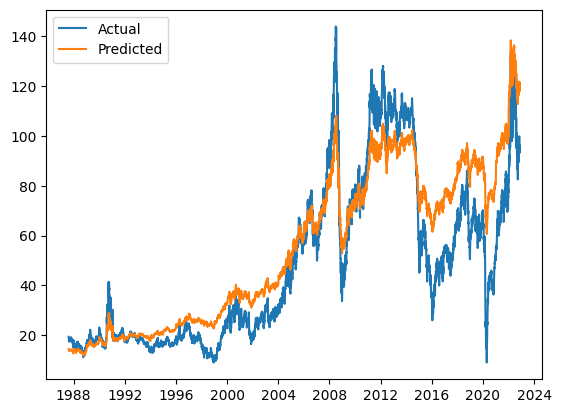

ValueError: too many values to unpack (expected 2)

In [16]:
# Call backtest with verbose logging off
y_actual, y_pred = ca.backtest_lstm(lstm_model, merged_df[["Price", "GDP"]], scaler)


In [ ]:
# Example Usage (after backtesting)
metrics = ca.evaluate_lstm(y_actual, y_pred)